In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skewnorm

In [5]:
df= sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
df = df.select_dtypes(exclude=["object"])
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [27]:
results =[]

for col in df.columns:

    results.append({
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode().iloc[0]
    })
df1 = pd.DataFrame(results)
df1
    

,Mean,Median,Mode
0,43.921930,44.45,41.1
1,17.151170,17.30,17.0
2,200.915205,197.00,190.0
3,4201.754386,4050.00,3800.0


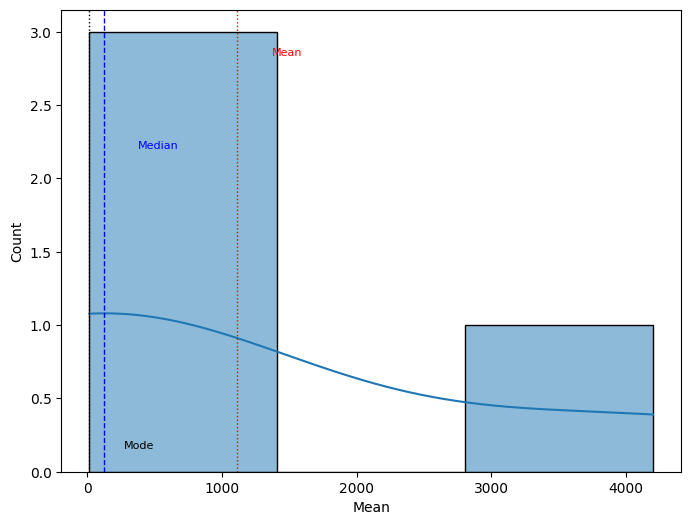

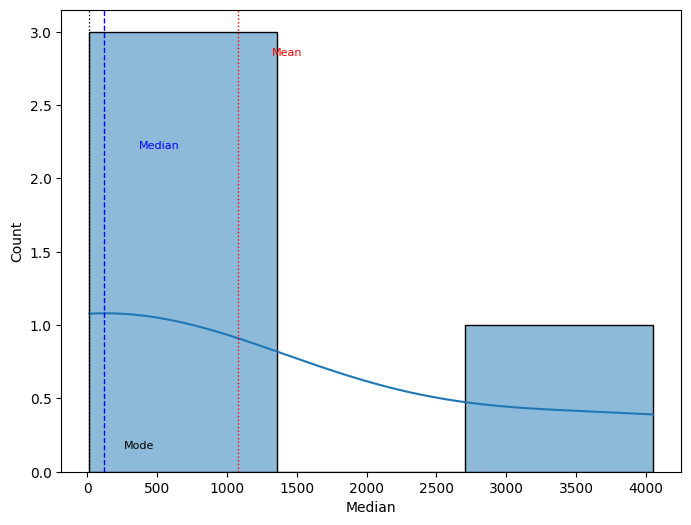

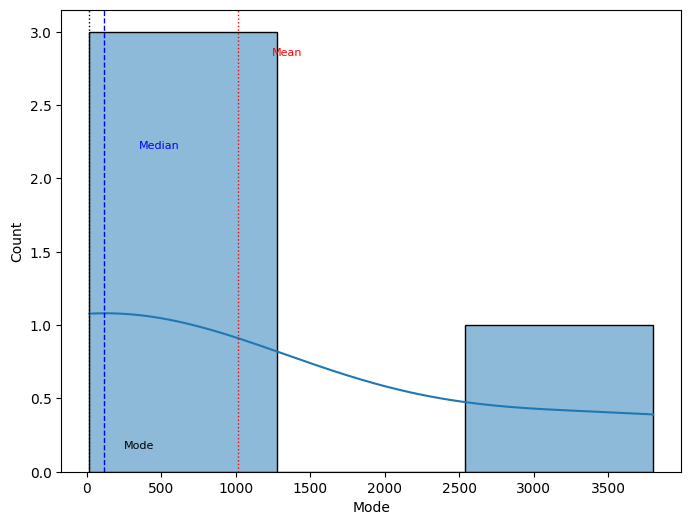

In [28]:
for col in df1.columns:
    fig, axes= plt.subplots(figsize=(8,6))
    sns.histplot(data=df1, x=col, kde=True)

    plt.axvline(df1[col].mean(), color="r", linestyle=":", linewidth=1)
    plt.text(df1[col].mean() + df1[col].std()/8, s="Mean", y=axes.get_ylim()[1]*0.90,
             fontsize = 8, color="r")
    
    plt.axvline(df1[col].median(), color="blue", linestyle="--", linewidth=1)
    plt.text(df1[col].median() + df1[col].std()/8, s="Median", y=axes.get_ylim()[1]*0.70,
             fontsize = 8, color="blue")
    
    plt.axvline(df1[col].mode().iloc[0], color="k", linestyle=":", linewidth=1)
    plt.text(df1[col].mode().iloc[0] + df1[col].std()/8, s="Mode", y=axes.get_ylim()[1]*0.05,
             fontsize = 8, color="k")

    plt.show()

# Second Practice

In [3]:
my_data= sns.load_dataset("mpg")
my_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
my_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
my_data["horsepower"] = my_data["horsepower"].fillna(my_data["horsepower"].mean())
my_data["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [10]:
my_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [22]:
transformed = my_data.to_csv("../data/transformed_mpg.csv", index=False)


In [23]:
new_data = pd.read_csv("../data/transformed_mpg.csv")
new_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [24]:
new_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [32]:
duplicate_check = new_data.duplicated()
duplicate_check

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [33]:
new_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [39]:
mod_data = new_data.select_dtypes(exclude="object")
mod_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [51]:
df = []
for col in mod_data.columns:
    data_frame = df.append({
        "Mean": mod_data[col].mean(),
        "Median": mod_data[col].median(),
        "Mode": mod_data[col].mode().iloc[0]})

df = pd.DataFrame(df)
df

,Mean,Median,Mode
0,23.514573,23.0,13.0
1,5.454774,4.0,4.0
2,193.425879,148.5,97.0
3,104.469388,95.0,150.0
4,2970.424623,2803.5,1985.0
5,15.568090,15.5,14.5
6,76.010050,76.0,73.0


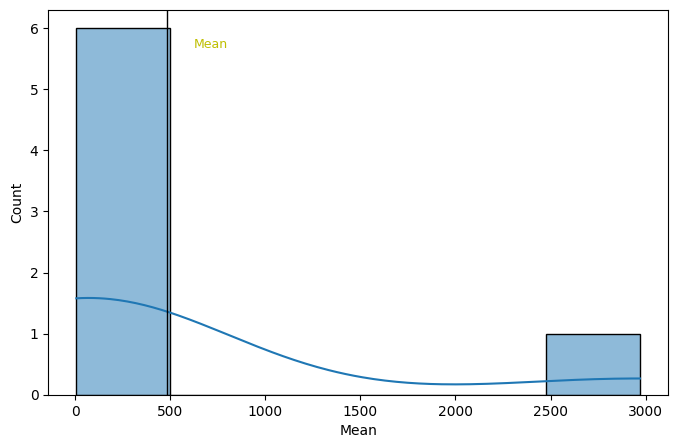

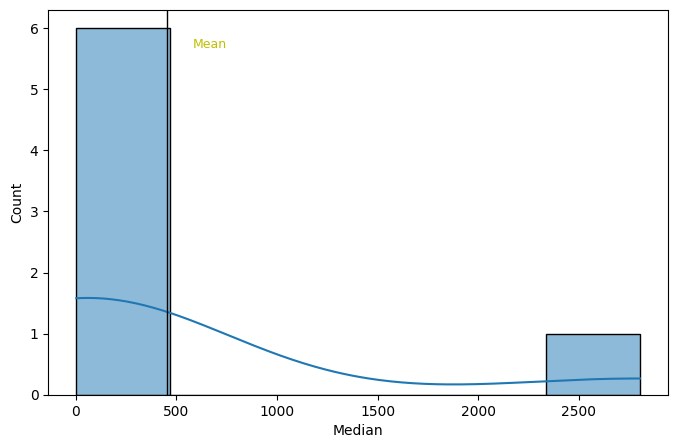

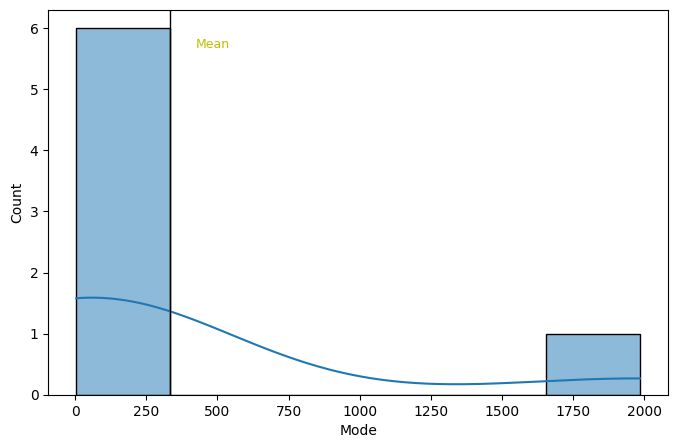

In [53]:
for col in df.columns:
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=df, x=col, kde=True)

    plt.axvline(df[col].mean(), linestyle="-", color="k", linewidth=1)
    plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1]*0.90, 
             s="Mean", color="y", fontsize=9)
    
    plt.show()

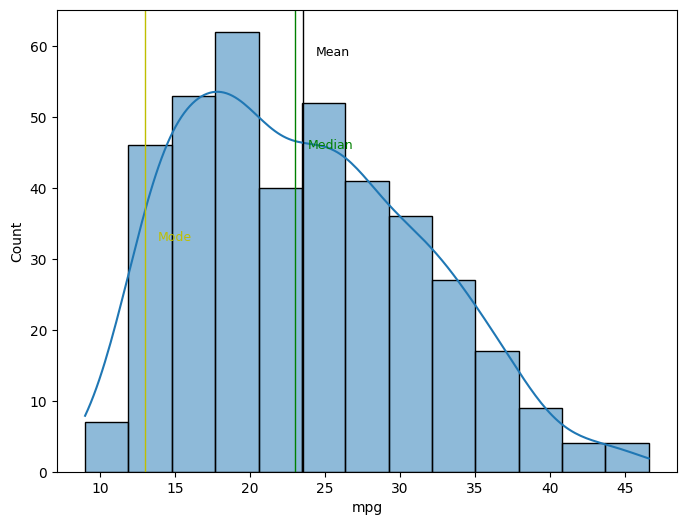

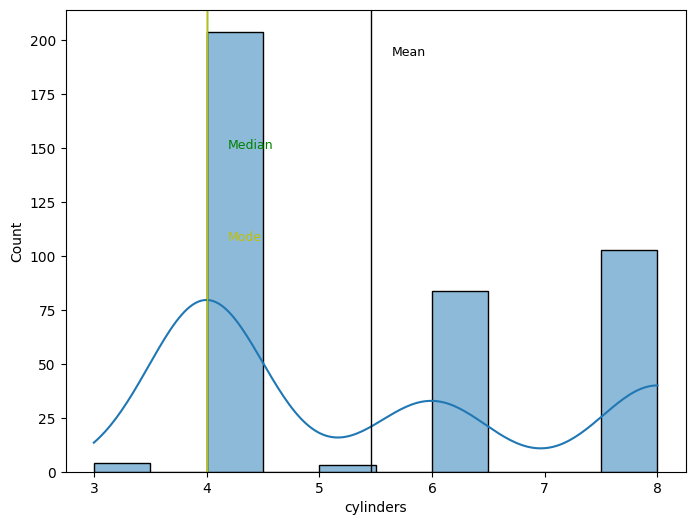

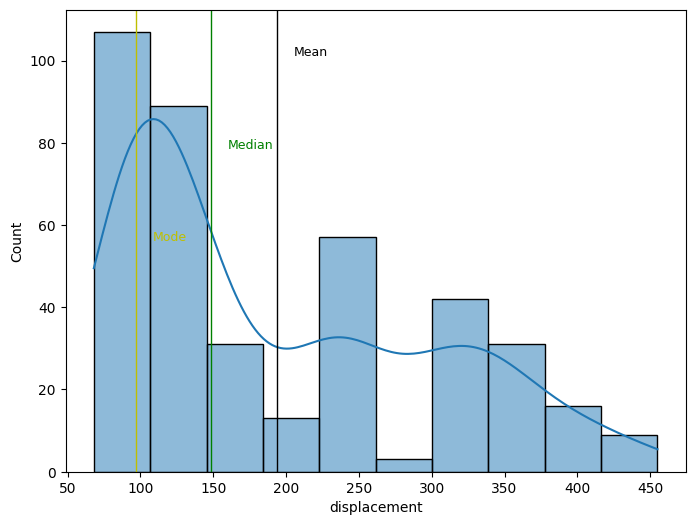

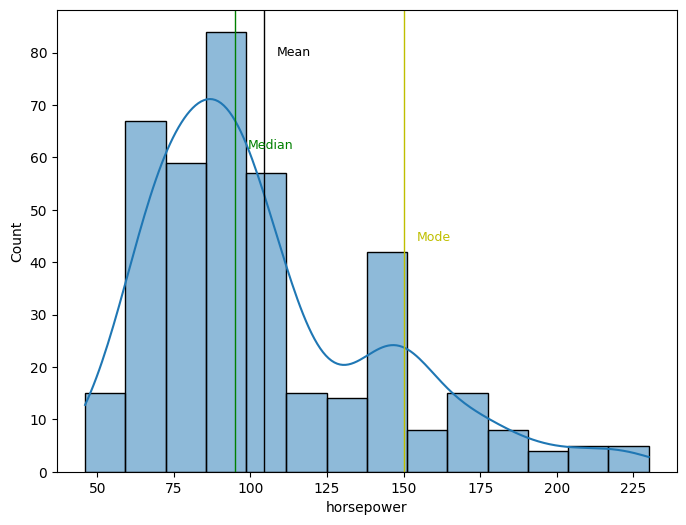

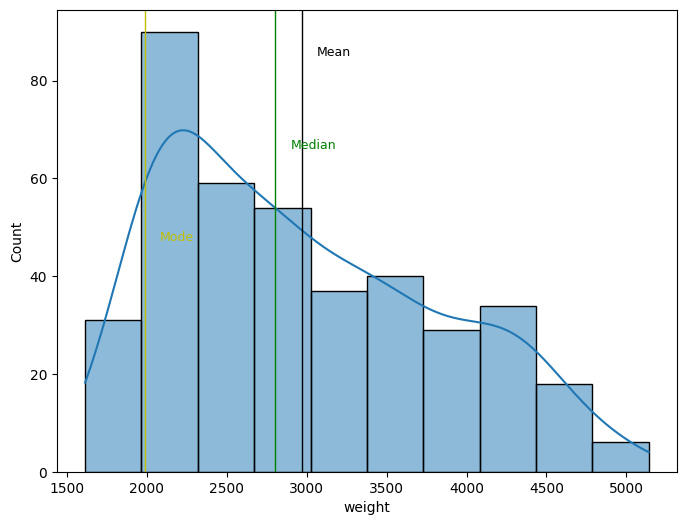

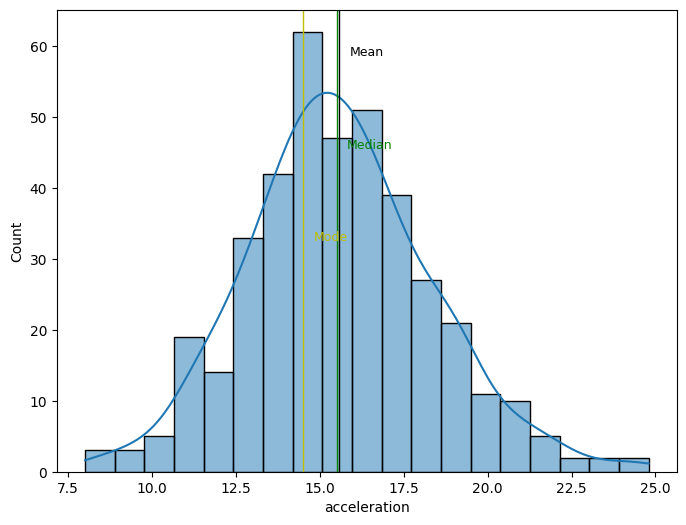

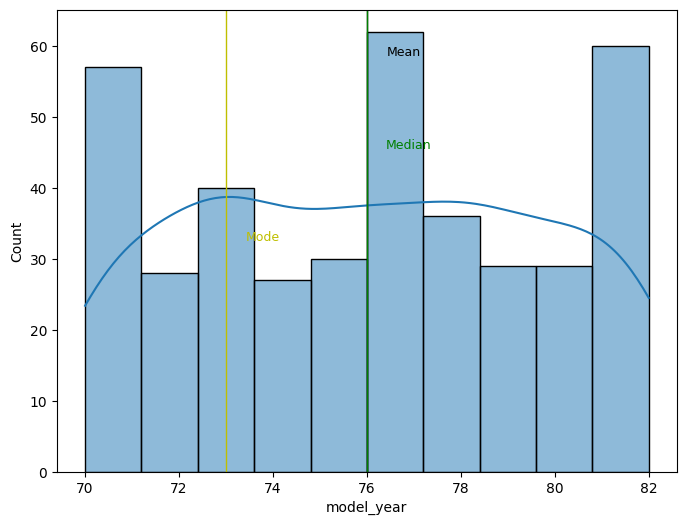

In [57]:
for col in mod_data.columns:
    fig, axes= plt.subplots(figsize=(8, 6))
    sns.histplot(data=mod_data, x=col, kde=True)

    plt.axvline(mod_data[col].mean(), linestyle="-", color="k", linewidth=1)
    plt.text(mod_data[col].mean() + mod_data[col].std()/9, 
             y=axes.get_ylim()[1]* 0.90, s="Mean", color="k", fontsize=9)
    
    plt.axvline(mod_data[col].median(), linestyle="-", color="g", linewidth=1)
    plt.text(mod_data[col].median() + mod_data[col].std()/9, 
             y=axes.get_ylim()[1]* 0.70, s="Median", color="g", fontsize=9)
    
    plt.axvline(mod_data[col].mode().iloc[0], linestyle="-", color="y", linewidth=1)
    plt.text(mod_data[col].mode().iloc[0] + mod_data[col].std()/9, 
             y=axes.get_ylim()[1]* 0.50, s="Mode", color="y", fontsize=9)
    
    plt.show()